In [1]:
import math
import numpy as np
import tkinter
import matplotlib
import matplotlib.pyplot as plt
import skimage.transform as sktr
import numpy as np
import scipy

# A

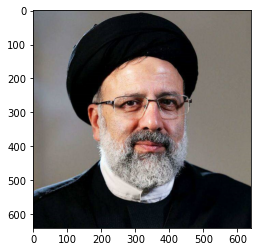

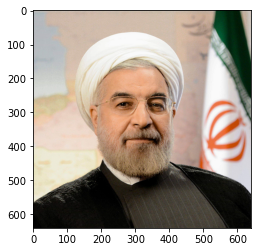

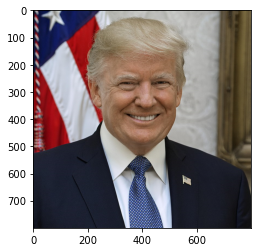

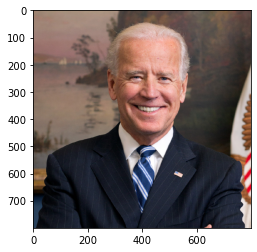

In [3]:
raisi = r"P5\raisi.png"
rohani = r"P5\rouhani.png"
trump= r"P5\trump.png"
biden= r"P5\biden.png"

raisi_img = plt.imread(raisi)
plt.imshow(raisi_img)
plt.show()
rohani_img = plt.imread(rohani)
plt.imshow(rohani_img)
plt.show()
trump_img= plt.imread(trump)
plt.imshow(trump_img)
plt.show()
biden_img= plt.imread(biden)
plt.imshow(biden_img)
plt.show()

# B

In [4]:
def craeting_pairs(image1,iamge2, N=2):

    plt.imshow(image1)
    click1, click2 = plt.ginput(n=N)
    plt.close()

    plt.imshow(iamge2)
    click3, click4 = plt.ginput(n=N)
    plt.close()
    return (click1, click2,click3, click4)

In [5]:

first_points = ((284.8679653679654, 273.7857142857142), (392.2272727272728, 266.8593073593073), (265.82034632034635, 275.517316017316), (361.05844155844153, 277.24891774891773))
print('cordinates of points in first pair are listed as below : ')
print(first_points)

second_points = ((343.2229437229437, 270.9285714285712), (468.76406926406924, 268.7640692640691), (377.85497835497836, 249.28354978354957), (479.58658008658006, 253.61255411255388))
print('cordinates of points in second pair are listed as below : ')
print(second_points)

cordinates of points in first pair are listed as below : 
((284.8679653679654, 273.7857142857142), (392.2272727272728, 266.8593073593073), (265.82034632034635, 275.517316017316), (361.05844155844153, 277.24891774891773))
cordinates of points in second pair are listed as below : 
((343.2229437229437, 270.9285714285712), (468.76406926406924, 268.7640692640691), (377.85497835497836, 249.28354978354957), (479.58658008658006, 253.61255411255388))


In [6]:
def recenter(im, r, c):
    R, C, _ = im.shape
    rpad = (int) (np.abs(2*r+1 - R))
    cpad = (int) (np.abs(2*c+1 - C))
    return np.pad(
        im, [(0 if r > (R-1)/2 else rpad, 0 if r < (R-1)/2 else rpad),
             (0 if c > (C-1)/2 else cpad, 0 if c < (C-1)/2 else cpad),
             (0, 0)], 'constant')

In [7]:
def find_centers(p1, p2):
    cx = np.round(np.mean([p1[0], p2[0]]))
    cy = np.round(np.mean([p1[1], p2[1]]))
    return cx, cy

In [8]:
def align_image_centers(im1, im2, pts):
    p1, p2, p3, p4 = pts
    cx1, cy1 = find_centers(p1, p2)
    cx2, cy2 = find_centers(p3, p4)

    im1 = recenter(im1, cy1, cx1)
    im2 = recenter(im2, cy2, cx2)
    return im1, im2

In [9]:
def rescale_images(im1, im2, pts):
    p1, p2, p3, p4 = pts
    len1 = np.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)
    len2 = np.sqrt((p4[1] - p3[1])**2 + (p4[0] - p3[0])**2)
    dscale = len2/len1
    if dscale < 1:
        im1 = sktr.rescale(im1, dscale)
    else:
        im2 = sktr.rescale(im2, 1./dscale)
    return im1, im2

In [11]:
def rotate_im(im1, pts):
    p1, p2, p3, p4 = pts
    theta1 = math.atan2(-(p2[1] - p1[1]), (p2[0] - p1[0]))
    theta2 = math.atan2(-(p4[1] - p3[1]), (p4[0] - p3[0]))
    dtheta = theta2 - theta1
    im1 = sktr.rotate(im1, dtheta*180/np.pi)
    return im1, dtheta

In [12]:
def match_img_size(im1, im2):
    h1, w1, _ = im1.shape
    h2, w2, _ = im2.shape
    if h1 < h2:
        im2 = im2[int(np.floor((h2-h1)/2.)) : -int(np.ceil((h2-h1)/2.)), :, :]
    elif h1 > h2:
        im1 = im1[int(np.floor((h1-h2)/2.)) : int(-np.ceil((h1-h2)/2.)), :, :]
    if w1 < w2:
        im2 = im2[:, int(np.floor((w2-w1)/2.)) : int(-np.ceil((w2-w1)/2.)), :]
    elif w1 > w2:
        im1 = im1[:, int(np.floor((w1-w2)/2.)) : int(-np.ceil((w1-w2)/2.)), :]
    return im1, im2

In [13]:
def align_images(im1, im2,pts):
    im1, im2 = align_image_centers(im1, im2, pts)
    im1, im2 = rescale_images(im1, im2, pts)
    im1, _ = rotate_im(im1, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2

In [14]:
raisi_align , rohani_align = align_images(raisi_img,rohani_img,first_points)
trump_align , biden_align = align_images(trump_img,biden_img,second_points)

In [15]:
def create_gray_image(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

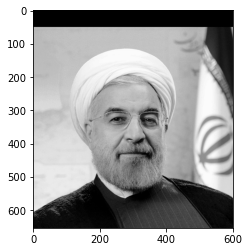

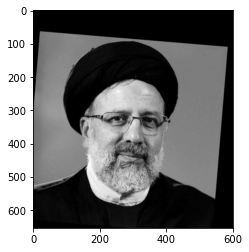

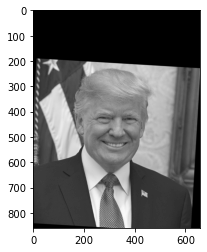

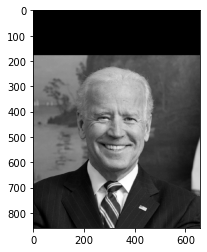

In [16]:
rohani_gray= create_gray_image(rohani_align)
raisi_gray= create_gray_image(raisi_align)
trump_gray= create_gray_image(trump_align)
biden_gray= create_gray_image(biden_align)

plt.imshow(rohani_gray,cmap="gray")
plt.show()

plt.imshow(raisi_gray,cmap="gray")
plt.show()
plt.imshow(trump_gray,cmap="gray")
plt.show()

plt.imshow(biden_gray,cmap="gray")
plt.show()

# C

In [17]:
def calcualte_fourier_transform(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    return fshift

def calculate_phase_and_magnitude(image):
    fshift = calcualte_fourier_transform(image)
    phase_spectrum = np.angle(fshift)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return phase_spectrum,magnitude_spectrum

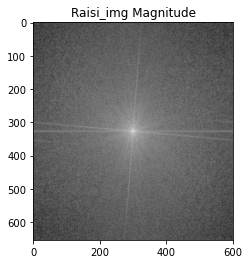

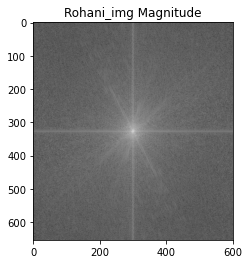

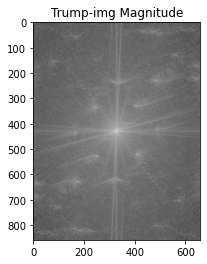

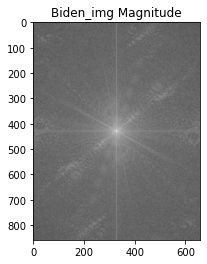

In [23]:
raisi_phase,raisi_magnitude = calculate_phase_and_magnitude(raisi_gray)
rohani_phase,rohani_magnitude = calculate_phase_and_magnitude(rohani_gray)
plt.imshow(raisi_magnitude,cmap="gray")
plt.title("Raisi_img Magnitude")
plt.show()
plt.imshow(rohani_magnitude,cmap="gray")
plt.title("Rohani_img Magnitude")
plt.show()

trump_phase,trump_magnitude = calculate_phase_and_magnitude(trump_gray)
biden_phase,biden_magnitude = calculate_phase_and_magnitude(biden_gray)
plt.imshow(trump_magnitude,cmap="gray")
plt.title("Trump-img Magnitude")
plt.show()
plt.imshow(biden_magnitude,cmap="gray")
plt.title("Biden_img Magnitude")
plt.show()

In [19]:
def create_hybrid_image(image1, image2, sigma,show_plt= True):
	low_pass = scipy.ndimage.filters.gaussian_filter(image1, sigma)
	high_pass = image2 - scipy.ndimage.filters.gaussian_filter(image2, sigma)
	if show_plt == True:
		plt.imshow(low_pass,cmap="Greys_r")
		plt.show()
		plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass)))),cmap="gray")
		plt.show()
		plt.imshow(high_pass,cmap="Greys_r")
		plt.show()
		plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass)))),cmap="gray")
		plt.show()
	return low_pass + high_pass

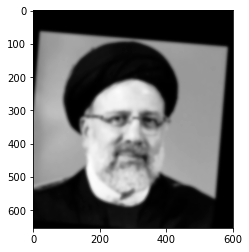

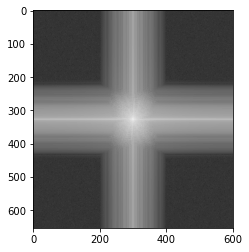

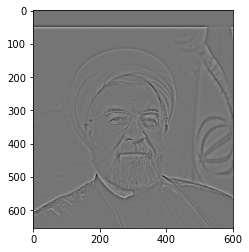

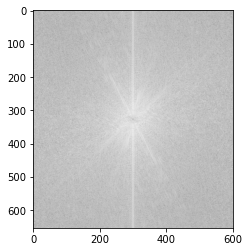

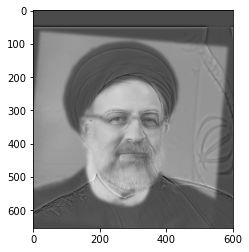

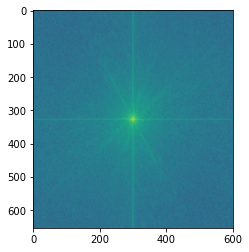

In [20]:
final_image = create_hybrid_image(raisi_gray, rohani_gray, 4)
plt.imshow(final_image, cmap="Greys_r")
plt.show()
_,magnitude_final = calculate_phase_and_magnitude(final_image)
plt.imshow(magnitude_final)
plt.show()

# D

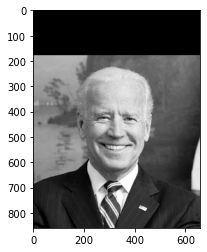

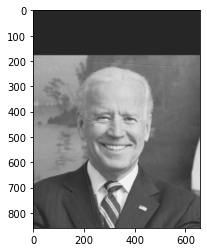

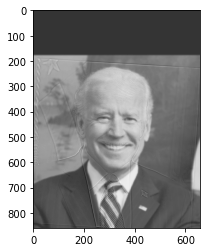

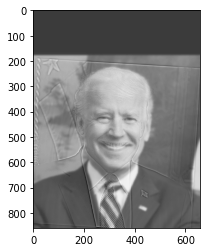

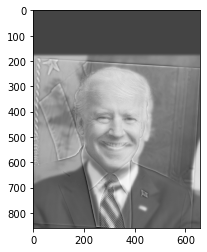

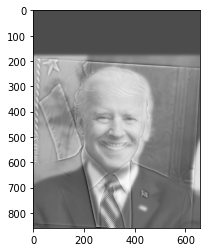

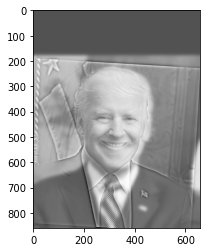

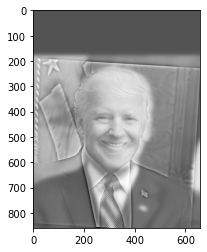

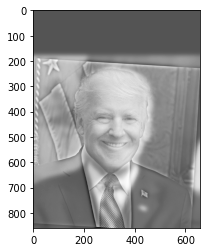

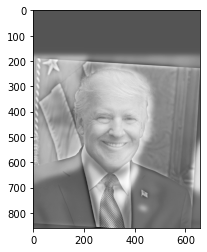

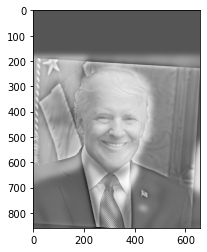

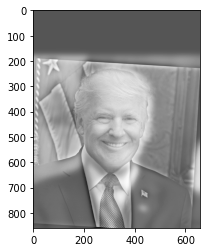

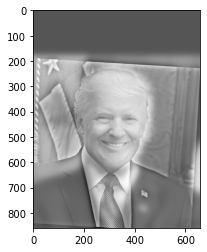

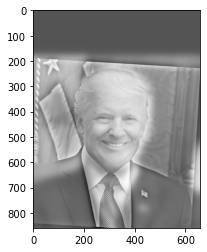

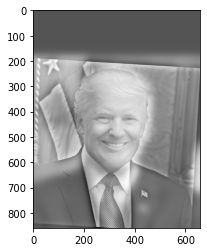

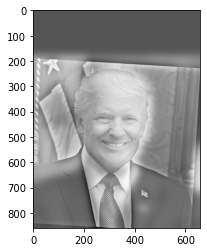

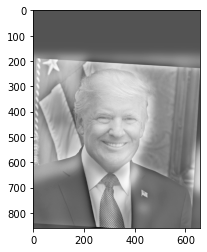

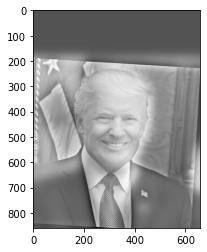

In [28]:
for i in range(0,18):
    final_image = create_hybrid_image(biden_gray, trump_gray, i,show_plt = False)
    plt.imshow(final_image, cmap="Greys_r")
    plt.show()
